### Load Excel Files for March

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np


march_file1 = pd.read_excel('MARCH_2022.xlsb', sheet_name='FILE 1', engine='pyxlsb')
march_file2 = pd.read_excel('MARCH_2022.xlsb', sheet_name='FILE 2', engine='pyxlsb')
march_file3 = pd.read_excel('MARCH_2022.xlsb', sheet_name='FILE 3', engine='pyxlsb')
march_file4 = pd.read_excel('MARCH_2022.xlsb', sheet_name='FILE 4', engine='pyxlsb')
march_file5 = pd.read_excel('MARCH_2022.xlsb', sheet_name='FILE 5', engine='pyxlsb')
march_file6 = pd.read_excel('MARCH_2022.xlsb', sheet_name='FILE 6', engine='pyxlsb')


In [7]:

march = pd.concat([march_file1, march_file2, march_file3,march_file4,march_file5,march_file6], axis=0)

print(f"Number of rows: {len(march)}")

Number of rows: 13831


### Data Information

| Name                          | Remarks                               |
|-------------------------------|------------------------------         |
| lineItem/UsageAccountId       |Dev, Stg, Production                   |
| lineItem/ProductCode          |AWS Resources                          |
| lineItem/ResourceId[Optional] |Shows the arn                          |
| lineItem/UnblendedCost        |Shows the usage cost per resource      | 
| lineItem/LineItemType         |Tax, Savings etc.                      |



Exclude the following to get the most accurate value: 
- credit
- refund
- saving plan recurring fee
- saving plan negation
- tax
- edp




### Calculate Costs/Resource/Environment

In [8]:

env_dict = {116698182371: '3. Prod',    
900051432098: '1. Dev',    
729890003133: '2. Stg'}    

# transform column
march['lineItem/UsageAccountId'] = march['lineItem/UsageAccountId'].map(env_dict) 

resources_cost_env_unblended = march.groupby([
    'lineItem/ProductCode', 'lineItem/UsageAccountId'])["lineItem/UnblendedCost"].sum().reset_index()

resources_cost_env_unblended.pivot(columns='lineItem/ProductCode',
         index='lineItem/UsageAccountId',
         values='lineItem/UnblendedCost')


lineItem/ProductCode,AWSELB,AWSLambda,AmazonCloudWatch,AmazonEC2,AmazonECR,AmazonECS,AmazonRDS,AmazonS3
lineItem/UsageAccountId,,,,,,,,
1. Dev,106.502210,1.450613,2.751711,112.086138,1.413321,945.761837,759.680424,0.265763
2. Stg,42.974927,0.736078,2.263490,112.225799,0.539308,698.456787,1306.086152,0.001613
3. Prod,45.388218,NaN,1.087597,174.220775,0.214694,467.554456,50.146251,0.033765


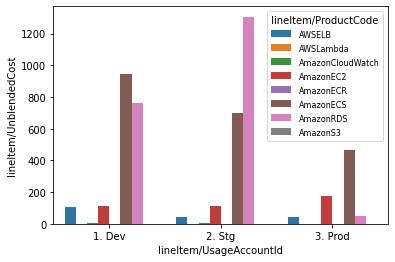

In [12]:

ax = sns.barplot(data=resources_cost_env_unblended,
            x='lineItem/UsageAccountId', y='lineItem/UnblendedCost', hue="lineItem/ProductCode")

plt.setp(ax.get_legend().get_texts(), fontsize='8')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='10')  # for legend title

plt.show()